# Восстановление золота из руды

## Подготовка данных

### Изучаем файлы 

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import make_scorer

In [2]:
# читаем файлы
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
display(data_train.head())
display(data_test.head())
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Таблицы умеют кучу данных, отражающих различные отраслевые параметры на протяжение всех этапов обработки. Уникальным индексом может послужить колонка с датой и временем.


In [4]:
print(data_train.info())
print(data_test.info())
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

Тип данных в удобных форматах. Но имеюся пропуски которые необходимо будет обработать. Также размер обучающей и тестовой выборке различен, необходимо будет это учесть в дальнейшей работе с моделями.

In [5]:
# поймем долю пропусков в датасете
percent_null = data_full.isna().mean()
percent_null[percent_null>0].sort_values(ascending=False).head(10)

secondary_cleaner.output.tail_sol           0.089922
rougher.input.floatbank11_xanthate          0.023304
rougher.state.floatbank10_e_air             0.022429
primary_cleaner.output.concentrate_sol      0.019034
secondary_cleaner.state.floatbank2_a_air    0.011317
final.output.concentrate_sol                0.010854
rougher.input.feed_size                     0.007459
primary_cleaner.output.concentrate_pb       0.005967
primary_cleaner.input.xanthate              0.005350
final.output.tail_pb                        0.005196
dtype: float64

Согласно результату пропуски у многих признаков имеют незначительную долю в тысячных процентов, поэтому такие строки с пропусками можно в дальнейшем просто выкинуть из датасета. Пропуски где их доля 1% и выше, возможно относятся к колонкам, которые нам не понадобятся в дальнейшем, так как не все признаки попали в тест, а значит мы и так их выкинем из обучающей выборки. Если же какие то колонки остануться то можно будет провести замену медианами/средним.

### Проверка эффективности обогащения

In [6]:
# создадим список с расчетными показателями.
def calcul_recovery(row):
    x = (row['rougher.output.concentrate_au']*(row['rougher.input.feed_au']-row['rougher.output.tail_au']))/(row['rougher.input.feed_au']*(row['rougher.output.concentrate_au']-row['rougher.output.tail_au']))*100
    return x

recovery_calcul = data_train.apply(calcul_recovery, axis=1)

In [7]:
# считаем МАЕ
mean_absolute_error(data_train['rougher.output.recovery'], recovery_calcul)


9.682896147825551e-15

Проверка пройдена успешно. Различия в расчетных показателях и из датасета мизерные, возможно из за каких то округлений.

### Анализ различий тестовой и обучающей выборки

In [8]:
#создадим список с названиями пропущенных колонок
score = []
for i in data_train.columns:
    if i not in data_test.columns:
        score.append(i)
score

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

По полученным данным видно, что не хватает следующей информации в тестовой выборке:
- На всех этапах отсутвует информация о доле примесей веществ в хвостах
- нет целевых колонок recovery
- нет информации о концентрированности вещест на выходе на всех этапах 
- На стадии флютации нет информации о расчетных характеристиках по реагенту сульфату

Как было сказанно в проекте некоторые данные измеряются значительно позже, чем нежели происходит сам процесс поэтому они отсутствуют в тестовой выборке.

### Предварительная обработка

In [9]:
#удалим колонки из обучащей выборки, которых нет в тестовой и сформируем отдельно таргет-признаки
target_rougher = data_train['rougher.output.recovery']
target_final = data_train['final.output.recovery']

In [10]:
data_train_features =data_train.drop(score ,axis=1)
data_train_features.shape

(14149, 53)

In [11]:
# разберемся с пропусками
data_train_features.isna().mean().sort_values(ascending=False)

rougher.state.floatbank10_e_air               0.030815
rougher.input.floatbank11_xanthate            0.030249
secondary_cleaner.state.floatbank2_a_air      0.015337
rougher.input.feed_size                       0.010177
primary_cleaner.input.xanthate                0.007068
rougher.input.feed_pb                         0.007068
rougher.input.feed_sol                        0.005513
rougher.input.floatbank11_sulfate             0.002544
primary_cleaner.input.depressant              0.002262
rougher.input.floatbank10_sulfate             0.002050
secondary_cleaner.state.floatbank2_b_air      0.001484
primary_cleaner.input.sulfate                 0.001414
rougher.input.floatbank10_xanthate            0.000565
rougher.input.feed_rate                       0.000565
secondary_cleaner.state.floatbank4_a_air      0.000424
primary_cleaner.state.floatbank8_b_air        0.000283
secondary_cleaner.state.floatbank3_a_air      0.000283
primary_cleaner.state.floatbank8_a_air        0.000283
primary_cl

In [12]:
# в признаках где больше 1% заменим параметры медианами
data_train_features['rougher.state.floatbank10_e_air'] = data_train_features['rougher.state.floatbank10_e_air'].fillna(data_train_features['rougher.state.floatbank10_e_air'].median())
data_train_features['rougher.input.floatbank11_xanthate'] = data_train_features['rougher.input.floatbank11_xanthate'].fillna(data_train_features['rougher.input.floatbank11_xanthate'].median())
data_train_features['secondary_cleaner.state.floatbank2_a_air'] = data_train_features['secondary_cleaner.state.floatbank2_a_air'].fillna(data_train_features['secondary_cleaner.state.floatbank2_a_air'].median())
data_train_features['rougher.input.feed_size'] = data_train_features['rougher.input.feed_size'].fillna(data_train_features['rougher.input.feed_size'].median())

In [13]:
# теперь удалим все строки с пропусками
data_train_features = data_train_features.dropna(axis=0)

In [14]:
#удалим строки из таргетов
target_rougher = target_rougher[data_train_features.index]
target_final = target_final[data_train_features.index]

In [15]:
# проведем те же манипуляции и с тестовой выборкой
data_test.isna().mean().sort_values(ascending=False)

rougher.input.floatbank11_xanthate            0.004726
rougher.input.feed_sol                        0.003970
secondary_cleaner.state.floatbank3_a_air      0.001701
rougher.input.floatbank11_sulfate             0.001512
primary_cleaner.input.depressant              0.000945
rougher.input.floatbank10_sulfate             0.000945
primary_cleaner.input.sulfate                 0.000756
primary_cleaner.input.xanthate                0.000756
secondary_cleaner.state.floatbank2_a_air      0.000567
rougher.input.feed_rate                       0.000567
secondary_cleaner.state.floatbank2_b_air      0.000378
rougher.input.feed_size                       0.000189
secondary_cleaner.state.floatbank6_a_level    0.000000
rougher.input.floatbank10_xanthate            0.000000
rougher.input.feed_au                         0.000000
rougher.input.feed_pb                         0.000000
primary_cleaner.state.floatbank8_d_level      0.000000
rougher.input.feed_ag                         0.000000
rougher.st

In [16]:
data_test = data_test.dropna(axis=0)

Данные готовы к дальнейшему анализу и изучению.

## Анализ данных

### Исследование концентрации металлов (Au, Ag, Pb)

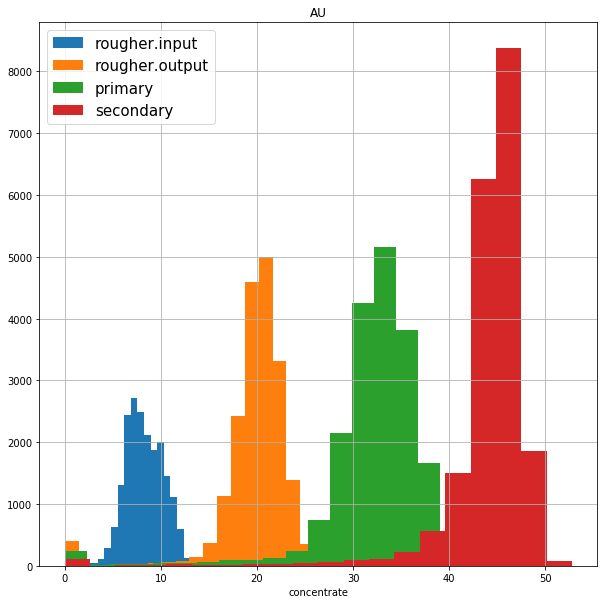

In [17]:
# для данного исследования будем использовать полный датасет. 
# как уже выяснелось, если там будут пропуски они незначительны по исследуемым параметрам, можно отдельно их не обрабатывать
# построим гистограму для каждого этапа и выведем на одном графике
# начнем с золота
plt.figure(figsize=(10,10))
plt.xlabel('concentrate')
plt.title('AU')
plt.grid(True)
plt.hist(data_full['rougher.input.feed_au'], bins=20, label='rougher.input')
plt.hist(data_full['rougher.output.concentrate_au'], bins=20, label='rougher.output')
plt.hist(data_full['primary_cleaner.output.concentrate_au'], bins=20, label='primary')
plt.hist(data_full['final.output.concentrate_au'], bins=20, label='secondary')
plt.legend(prop={'size': 15})

На графике отчетлива видно основную тенденцию, что После каждого этапа отчистки содержания золота возрастает, причем в несколько раз. Также есть небольшой выброс в начале, скорее всего он вызван тем, что это было сырье с изначально низким содержанием золото, либо небольшие погрености технологического процесса при котором терялась концентрация. В целом видно, что каждый этап очистки обладает стабильной и хорошей эффективностью изучим другие металлы.

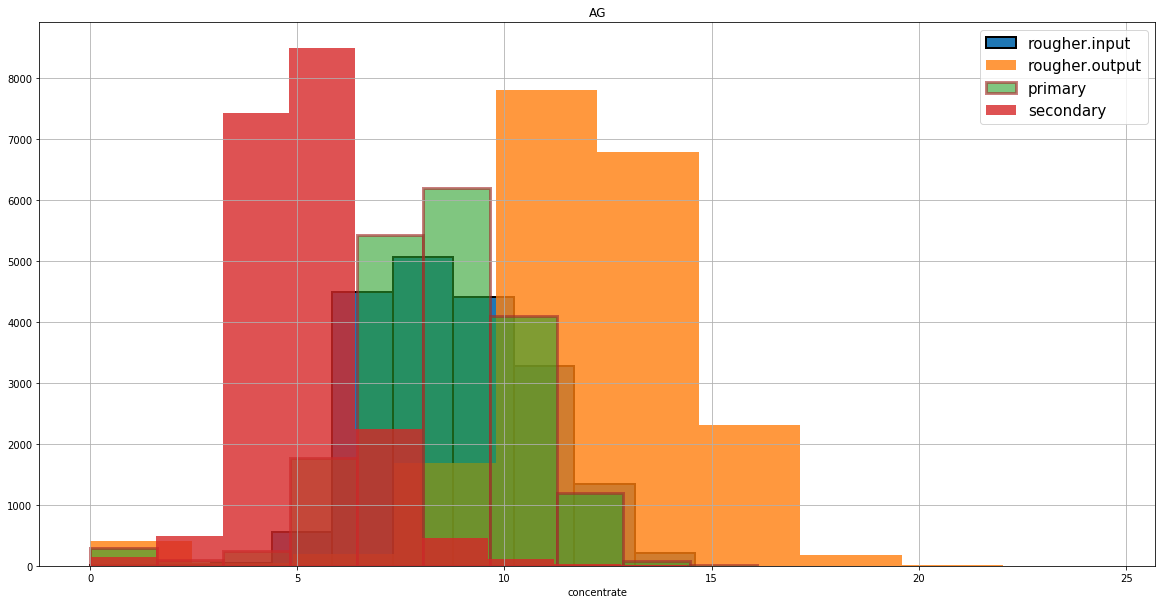

In [18]:
plt.figure(figsize=(20,10))
plt.xlabel('concentrate')
plt.grid(True)
plt.title('AG')
plt.hist(data_full['rougher.input.feed_ag'], bins=10, label='rougher.input',alpha=1, edgecolor="black", linewidth=2)
plt.hist(data_full['rougher.output.concentrate_ag'], bins=10, label='rougher.output', alpha=0.8)
plt.hist(data_full['primary_cleaner.output.concentrate_ag'], bins=10, label='primary', alpha=0.6, edgecolor="brown", linewidth=3)
plt.hist(data_full['final.output.concentrate_ag'], bins=10, label='secondary', alpha=0.8)
plt.legend(prop={'size': 15})

С концентрацией серебра ситуация выходит интереснее. В отличие от золота тут нету больших скачков по еденицам измерения. Также после процесса флотации его концентрация в целом растет, однакок после первой очистки она вовращается практически к исходном данным, хотя все равно с небольшим повышением. И лишь после второй на выходе его концентрация становится ниже чем у входного сырья.

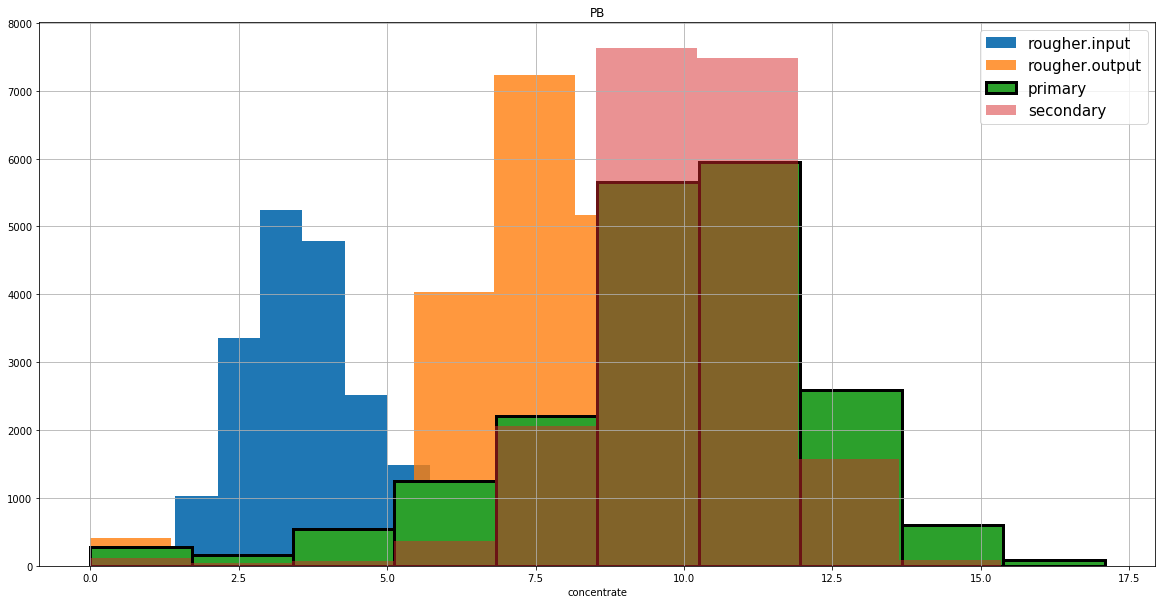

In [19]:
plt.figure(figsize=(20,10))
plt.xlabel('concentrate')
plt.grid(True)
plt.title('PB')
plt.hist(data_full['rougher.input.feed_pb'], bins=10, label='rougher.input')
plt.hist(data_full['rougher.output.concentrate_pb'], bins=10, label='rougher.output', alpha=0.8)
plt.hist(data_full['primary_cleaner.output.concentrate_pb'], bins=10, label='primary', alpha=1, edgecolor="black", linewidth=3)
plt.hist(data_full['final.output.concentrate_pb'], bins=10, label='secondary', alpha=0.5)
plt.legend(prop={'size': 15})

У свинца тоже как и у серебра нет больших скачков в числовом выражении, однако у него тоже свои правила в отношении отчисток. При флотации  его доля растет, затем после первой его доля также растет, а вторая отчистка судя по графику оказывает не такое уже существенное влияние на его концентрации и практически она остается такой же.

### Сравнение распределения размере гранул

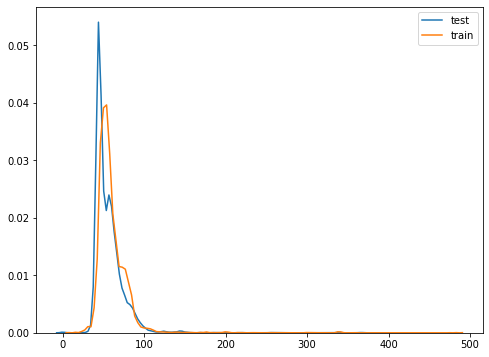

In [20]:
# размеры гранул находятся в двух признаках - перед флотацией и перед первичной очисткой 
# построим график распределения плотности kdeplot
plt.figure(figsize=(8, 6)) 
test = sb.kdeplot(data_test['rougher.input.feed_size'], label='test')
sb.kdeplot(data_train_features['rougher.input.feed_size'], ax=test, label='train')

В целом выборки имеют схожее распределение. Обучающая выборка немного смещенна в право относительно тестовой выборке. Скорее всего это из-за смещения средних. Сильного различия между ними нет.

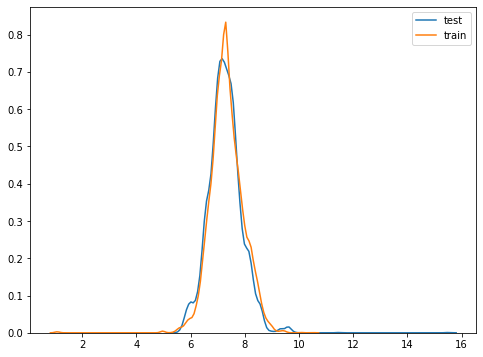

In [21]:
plt.figure(figsize=(8, 6)) 
test = sb.kdeplot(data_test['primary_cleaner.input.feed_size'], label='test')
sb.kdeplot(data_train_features['primary_cleaner.input.feed_size'], ax=test, label='train')

На стадии после флотации распределение становится практически одинаково для размера гранул выборок. С данными выборками можно продолжать работу.

### Исследование суммарной концентрации веществ

In [22]:
# создадим колонки с итооговыми суммами концентратов каждого этапа
data_full["rougher_input_total"] = data_full["rougher.input.feed_sol"]+data_full["rougher.input.feed_au"]+data_full["rougher.input.feed_pb"]+data_full["rougher.input.feed_ag"]
data_full["rougher_output_total"] = data_full["rougher.output.concentrate_ag"]+data_full["rougher.output.concentrate_au"]+data_full["rougher.output.concentrate_pb"]+data_full["rougher.output.concentrate_sol"]
data_full["final_output_total"] = data_full["final.output.concentrate_ag"]+data_full["final.output.concentrate_au"]+data_full["final.output.concentrate_pb"]+data_full["final.output.concentrate_sol"]


(array([5.000e+00, 1.000e+00, 8.000e+00, 9.000e+00, 5.000e+00, 1.400e+01,
        2.000e+01, 4.000e+01, 8.700e+01, 1.250e+02, 2.350e+02, 4.830e+02,
        1.210e+03, 2.808e+03, 4.712e+03, 4.295e+03, 2.831e+03, 1.784e+03,
        5.080e+02, 6.500e+01]),
 array([3.99999991e-02, 3.88694737e+00, 7.73389473e+00, 1.15808421e+01,
        1.54277895e+01, 1.92747368e+01, 2.31216842e+01, 2.69686316e+01,
        3.08155789e+01, 3.46625263e+01, 3.85094737e+01, 4.23564210e+01,
        4.62033684e+01, 5.00503158e+01, 5.38972631e+01, 5.77442105e+01,
        6.15911579e+01, 6.54381052e+01, 6.92850526e+01, 7.31320000e+01,
        7.69789473e+01]),
 <a list of 20 Patch objects>)

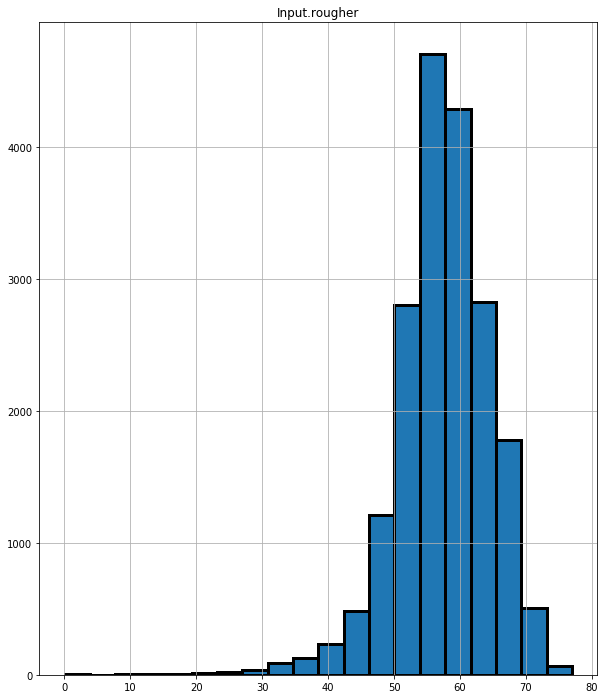

In [23]:
# построим гистограммы чтобы посмотреть на распределения
plt.figure(figsize=(10,12))
plt.grid(True)
plt.title('Input.rougher')
plt.hist(data_full['rougher_input_total'], bins=20,edgecolor="black", linewidth=3)


Распределение скошено влево. Есть немного значений имеющих небольшую концентрацию веществ. 

(array([4.000e+02, 2.000e+00, 3.000e+00, 2.000e+00, 9.000e+00, 1.100e+01,
        3.000e+01, 4.500e+01, 5.900e+01, 1.140e+02, 1.070e+02, 1.800e+02,
        4.950e+02, 1.036e+03, 2.440e+03, 5.151e+03, 5.053e+03, 3.122e+03,
        1.042e+03, 1.150e+02]),
 array([ 0.        ,  4.40700597,  8.81401194, 13.2210179 , 17.62802387,
        22.03502984, 26.44203581, 30.84904177, 35.25604774, 39.66305371,
        44.07005968, 48.47706564, 52.88407161, 57.29107758, 61.69808355,
        66.10508951, 70.51209548, 74.91910145, 79.32610742, 83.73311338,
        88.14011935]),
 <a list of 20 Patch objects>)

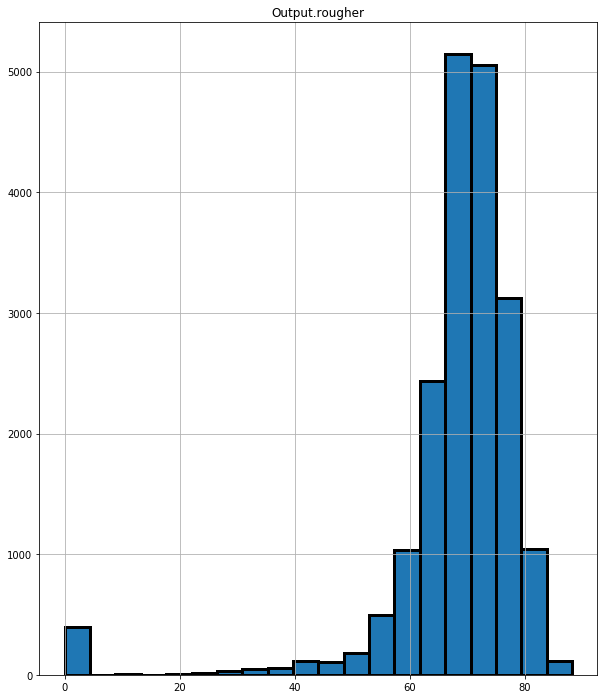

In [24]:
plt.figure(figsize=(10,12))
plt.grid(True)
plt.title('Output.rougher')
plt.hist(data_full['rougher_output_total'], bins=20,edgecolor="black", linewidth=3)

Аналогично предыдущему выводу, но также замечены явные выбросы с 0 значением. Возможно это технические ошибки, в любом случае для данного сета это анамолии нужно будет от них избавится.

(array([1.0100e+02, 2.0000e+00, 9.0000e+00, 1.3000e+01, 2.0000e+01,
        1.6000e+01, 2.1000e+01, 2.0000e+01, 3.4000e+01, 3.1000e+01,
        3.6000e+01, 6.4000e+01, 6.8000e+01, 9.5000e+01, 1.4900e+02,
        5.7600e+02, 3.9580e+03, 1.0859e+04, 2.9120e+03, 2.4300e+02]),
 array([ 0.        ,  4.01053221,  8.02106442, 12.03159663, 16.04212884,
        20.05266105, 24.06319326, 28.07372547, 32.08425768, 36.09478989,
        40.1053221 , 44.11585431, 48.12638652, 52.13691873, 56.14745094,
        60.15798315, 64.16851536, 68.17904757, 72.18957978, 76.20011199,
        80.2106442 ]),
 <a list of 20 Patch objects>)

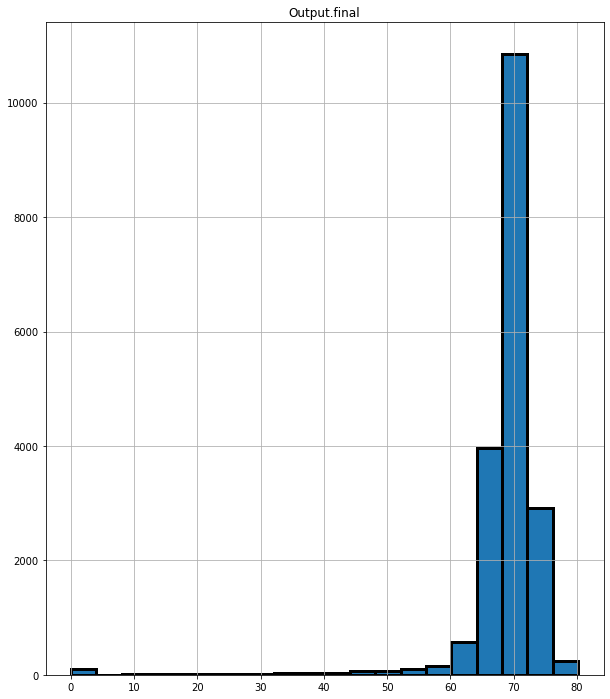

In [25]:
plt.figure(figsize=(10,12))
plt.grid(True)
plt.title('Output.final')
plt.hist(data_full['final_output_total'], bins=20,edgecolor="black", linewidth=3)

Аналогично предыдущей стадии. Видно, что после очисток концентрациия всех веществ приближается в итоге к одному значению, так как разброс стал меньше.

In [26]:
# Теперь избавимся от 0 концентраций в тестовой и обучающей выборке, 
#сначала отберем во всем дата сете строки с 0 концентрациями на всех этапах
data_full_zero = data_full.query('rougher_input_total<= 0 or rougher_output_total<= 0 or final_output_total<=0')
x = data_full_zero['date'].values

In [27]:
# уберем выбросы из наших выборок
data_train_features = data_train_features.query('date not in @x')
data_test = data_test.query('date not in @x')

In [28]:
# также убираем из обучающих таргетов
target_rougher = target_rougher[data_train_features.index]
target_final = target_final[data_train_features.index]

Мы увидели как меняются количества металлов на разных стадиях, избавились от артефактов и также поняли что наши выборки годятся для дальнейшего построения моделей.

## Модель

### Функция для расчета SMAPE

In [29]:
# Пишем функцию для расчета SMAPE
def smape(target, predict):
    smape_a=0   
    for i in range(len(target)):
        smape_a += ((abs(target[i]-predict[i]))/((abs(target[i])+abs(predict[i]))/2))*100
        smape = smape_a/len(target)
    return smape
        

### Поиск и обучение моделей

In [30]:
# сохраним колонки с датами в индексам на тестовой и обучающих выборках, тем самым сохраним уникальные индефикаторы
#и уберем их из признаков модели
data_train_features.set_index('date', inplace=True)
data_test.set_index('date', inplace=True)

In [31]:
# почитаем метрику с помощью константной модели, чтобы иметь стартовую позицию для понимания качества
const_predict_r = pd.Series(target_rougher.median(), index=target_rougher.index)
const_predict_f = pd.Series(target_final.median(), index=target_rougher.index)
print(smape(target_rougher.values, const_predict_r.values))
print(smape(target_final.values, const_predict_f.values))
0.25*smape(target_rougher.values, const_predict_r.values)+0.75*smape(target_final.values, const_predict_f.values)

7.156682725930234
9.715341946159933


9.075677141102508

In [32]:
# проведем маштабирование так как будет проверяться линейная регрессия
scaler = StandardScaler()
scaler.fit(data_train_features) 
data_train_features = scaler.transform(data_train_features)

In [61]:
# проверяем модель дерева 
best_score = 10000000000000000000000000000000000
best_depth = 0
for depth in range(1, 8):
    tree = DecisionTreeRegressor(random_state=100, max_depth=depth)
    scores1 = cross_val_score(tree, data_train_features, target_rougher.values, cv=4, scoring = make_scorer(smape))
    scores2 =cross_val_score(tree, data_train_features, target_final.values, cv=4, scoring = make_scorer(smape))
    score_mean1 = scores1.mean()
    score_mean2 = scores2.mean()
    score_final = 0.25*score_mean1+0.75*score_mean2
    if best_score > score_final:
        best_score =  score_final
        best_depth = depth
        
best_score, best_depth

(8.712319232662077, 3)

Дерево имеет приемлимый результат. Проверим линейную регрессию


In [62]:
linear = LinearRegression()
scores1 = cross_val_score(linear, data_train_features, target_rougher.values, cv=4, scoring = make_scorer(smape))
scores2 =cross_val_score(linear, data_train_features, target_final.values, cv=4, scoring = make_scorer(smape))
score_mean1 = scores1.mean()
score_mean2 = scores2.mean()
score_final = 0.25*score_mean1+0.75*score_mean2
score_final

9.780798820263172

Линейная регрессия себя показала плохо. Проверим лес

In [64]:
best_score = 10000000000000000000000000000000000
best_depth = 0
for depth in range(1,8):
    forest = RandomForestRegressor(random_state=100, n_estimators=10, max_depth=depth)
    scores1 = cross_val_score(forest, data_train_features, target_rougher.values, cv=4, scoring = make_scorer(smape))
    scores2 =cross_val_score(forest, data_train_features, target_final.values, cv=4, scoring = make_scorer(smape))
    score_mean1 = scores1.mean()
    score_mean2 = scores2.mean()
    score_final = 0.25*score_mean1+0.75*score_mean2
    if best_score > score_final:
        best_score =  score_final
        best_depth = depth
        
best_score, best_depth 

(8.275438632827811, 3)

In [66]:
best_score = 10000000000000000000000000000000000
best_estimators = 0
for estimators in range(10, 50, 10):
    forest = RandomForestRegressor(random_state=100, n_estimators=estimators, max_depth=5)
    scores1 = cross_val_score(forest, data_train_features, target_rougher.values, cv=4, scoring = make_scorer(smape))
    scores2 =cross_val_score(forest, data_train_features, target_final.values, cv=4, scoring = make_scorer(smape))
    score_mean1 = scores1.mean()
    score_mean2 = scores2.mean()
    score_final = 0.25*score_mean1+0.75*score_mean2
    if best_score > score_final:
        best_score =  score_final
        best_estimators = estimators
        
best_score, best_estimators

(8.275438632827811, 10)

Лучшей моделью стала модель случайного леса с глубиной 5 и оценциками 30. Теперь протестируем данную модель на тестовой выборке.

In [56]:
#отберем таргет столбцы для тестовой выборки из всего дата сета
z = np.array(data_test.index)
target_rougher_test = data_full.query('date in @z')['rougher.output.recovery']
target_final_test = data_full.query('date in @z')['final.output.recovery']

In [68]:
const_predict_r = pd.Series(target_rougher_test.median(), index=target_rougher_test.index)
const_predict_f = pd.Series(target_final_test.median(), index=target_rougher_test.index)
0.25*smape(target_rougher_test.values, const_predict_r.values)+0.75*smape(target_final_test.values, const_predict_f.values)

6.651775609352365

In [70]:
# протестируем модель
model = RandomForestRegressor(random_state=100, n_estimators=30, max_depth=5)
scores1 = cross_val_score(forest, data_test, target_rougher_test.values, cv=7, scoring = make_scorer(smape))
scores2 =cross_val_score(forest, data_test, target_final_test.values, cv=7, scoring = make_scorer(smape))
score_mean1 = scores1.mean()
score_mean2 = scores2.mean()
score_final = 0.25*score_mean1+0.75*score_mean2
    
score_final

6.56641425489713

В данном случае пришлось увеличить количество кросс-валидационных блоков. Модель дала лучший результат, чем константная модель.

Мы проверили как меняется концентрация веществ на разных стадиях очистки. Металлы ведут себя по разному, но главное, что концентрация золота растет на протяжении всех этапов.
Также была найдена модель позволяющая оценить процесс восстановления золота из золотосодержащей руды. В ходе данного проекта на роль лучшей модели предложена модель случайного леса.